# **Project - Analysing Netflix and TV dataset**
# **Done by- Rohan Somadder**

### This is a case study on the data available about Netflix and TV shows

# Initializing libraries and cleaning data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
main_df = pd.read_csv('netflix_titles.csv')
main_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
598,s599,TV Show,Ask the StoryBots,NaN,"Judy Greer, Erin Fitzgerald, Fred Tatasciore, ...",United States,"August 2, 2019",2019,TV-Y,3 Seasons,Kids' TV,Five curious little creatures track down the a...
4779,s4780,TV Show,Parks and Recreation,NaN,"Amy Poehler, Rashida Jones, Aziz Ansari, Nick ...",United States,"January 13, 2016",2015,TV-14,7 Seasons,TV Comedies,"In this Emmy-nominated comedy, an employee wit..."
7467,s7468,Movie,Walk with Me,"Marc Francis, Max Pugh","Benedict Cumberbatch, Thich Nhat Hanh",United Kingdom,"December 26, 2017",2017,TV-PG,94 min,Documentaries,A community of monks in France led by Zen Budd...
6198,s6199,Movie,The Car,Elliot Silverstein,"James Brolin, Kathleen Lloyd, John Marley, R.G...",United States,"June 1, 2020",1977,PG,96 min,"Cult Movies, Horror Movies","In his small Southwestern town, sheriff Wade P..."
6335,s6336,TV Show,The Epic Tales of Captain Underpants,NaN,"Nat Faxon, Jay Gragnani, Ramone Hamilton, Sean...",United States,"July 19, 2019",2019,TV-Y7,3 Seasons,"Kids' TV, TV Comedies",Fourth-grade friends George and Harold have a ...


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### As the data contains many missing values but these are factual data, thus we can either do the analysis with these missing data or delete them and continue our work.

### Among the both the later option more fruitful

In [5]:
new_df=main_df.copy()
new_df=new_df.dropna()

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4808 non-null   object
 1   type          4808 non-null   object
 2   title         4808 non-null   object
 3   director      4808 non-null   object
 4   cast          4808 non-null   object
 5   country       4808 non-null   object
 6   date_added    4808 non-null   object
 7   release_year  4808 non-null   int64 
 8   rating        4808 non-null   object
 9   duration      4808 non-null   object
 10  listed_in     4808 non-null   object
 11  description   4808 non-null   object
dtypes: int64(1), object(11)
memory usage: 488.3+ KB


Now the dataset is completly free of any **NaN** values, thus we will start exploring the dataset. 

In [7]:
# As the date added column is a series element we will change it
print(type(new_df['date_added']))
new_df['date_added']=pd.to_datetime(new_df.date_added)
new_df.sample(3)

<class 'pandas.core.series.Series'>


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
665,s666,Movie,Babamın Ceketi,Müfit Can Saçıntı,"Müfit Can Saçıntı, Mert Turak, Ünal Yeter, Eli...",Turkey,2020-04-17,2018,TV-MA,101 min,"Comedies, International Movies","Facing pressure to marry immediately, an unemp..."
3928,s3929,Movie,Marc Maron: End Times Fun,Lynn Shelton,Marc Maron,United States,2020-03-10,2020,TV-MA,71 min,Stand-Up Comedy,Marc Maron wades through a swamp of vitamin hu...
4523,s4524,Movie,NOVA: Chinese Chariot Revealed,Giulia Clark,Eric Meyers,United States,2019-07-01,2017,TV-PG,54 min,Documentaries,The chariot dominated Chinese warfare for mill...


## Now we will rename the columns with proper names
The names given here are as according to more recognisable names or the most widely accepted ones.

In [8]:
new_df.rename(columns={'title':'name','listed_in':'genre','description':'synopsis'}).sample(5)

,show_id,type,name,director,cast,country,date_added,release_year,rating,duration,genre,synopsis
945,s946,Movie,Black '47,Lance Daly,"Hugo Weaving, James Frecheville, Stephen Rea, ...","Ireland, Luxembourg, Belgium",2020-10-24,2018,R,100 min,"Action & Adventure, Dramas, Independent Movies",When the Great Famine ravages his beloved coun...
185,s186,Movie,A Heavy Heart,Thomas Stuber,"Peter Kurth, Lena Lauzemis, Lina Wendel, Edin ...",Germany,2017-02-15,2015,TV-MA,109 min,"Dramas, Independent Movies, International Movies","Long past his heyday, a still-virile boxer tri..."
4296,s4297,Movie,Mustang Island,Craig Elrod,"Macon Blair, Lee Eddy, John Merriman, Byron Br...",United States,2018-01-02,2017,TV-14,86 min,"Comedies, Dramas, Independent Movies","After being dumped on New Year's Eve, Bill pur..."
157,s158,Movie,A Choo,"Kevin Ko, Peter Tsi","Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong...",Taiwan,2020-10-14,2020,TV-14,101 min,"Action & Adventure, International Movies, Roma...",Determined to win the heart of his childhood c...
499,s500,Movie,Ana e Vitória,Matheus Souza,"Ana Caetano, Vitória Falcão, Clarissa Müller, ...",Brazil,2018-11-02,2018,TV-MA,116 min,"Comedies, International Movies, LGBTQ Movies","After meeting by chance, two young musicians w..."


# Now the data is ready for further exploration

In [9]:
# First we will split the data into Movies and TV Shows
movies_df = new_df[new_df['type']=='Movie'].copy()
movies_df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6839,s6840,Movie,The Rugrats Movie,"Igor Kovalyov, Norton Virgien","Elizabeth Daily, Christine Cavanaugh, Kath Sou...",United States,2019-10-01,1998,G,81 min,"Children & Family Movies, Comedies","When his baby brother Dil is born, Tommy Pickl..."
6318,s6319,Movie,The Duel,Kieran Darcy-Smith,"Woody Harrelson, Liam Hemsworth, Alice Braga, ...",United States,2019-06-02,2016,R,110 min,Dramas,"In 1866, a Texas Ranger investigates some susp..."
6452,s6453,Movie,The History of Future Folk,"John Mitchell, Jeremy Kipp Walker","Nils d'Aulaire, Jay Klaitz, Julie Ann Emery, A...",United States,2020-12-23,2012,TV-14,85 min,"Action & Adventure, Comedies, Independent Movies",An alien ordered to colonize Earth abandons hi...


In [10]:
tv_shows_df = new_df[new_df['type']=='TV Show'].copy()
tv_shows_df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3951,s3952,TV Show,Mars,Everardo Gout,"Jihae, Alberto Ammann, Clémentine Poidatz, Ana...",United States,2019-11-01,2018,TV-PG,2 Seasons,"Docuseries, Science & Nature TV, TV Dramas",Fact meets fiction in this docudrama chronicli...
2431,s2432,TV Show,Girls und Panzer,Tsutomu Mizushima,"Mai Fuchigami, Ai Kayano, Mami Ozaki, Ikumi Na...",Japan,2019-12-15,2012,TV-PG,1 Season,"Anime Series, International TV Shows",Miho Nishizumi tries to escape her family's tr...
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020-11-11,2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...


# Exploratory Data Analysis

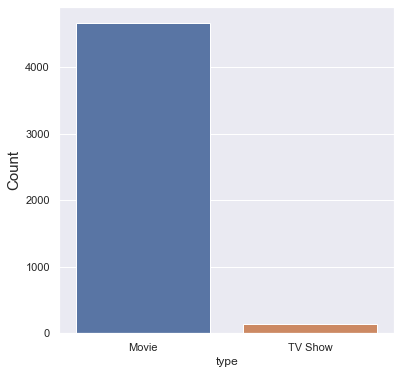

In [11]:
# let's find the distribution of Movies vs TV Shows 
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(new_df['type'])
plt.ylabel('Count',fontsize=15);

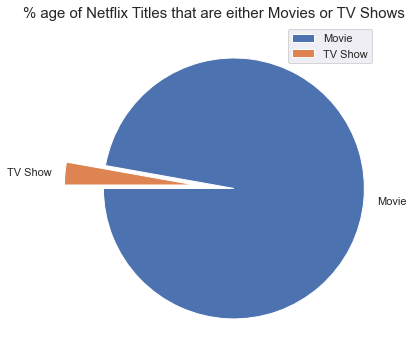

In [12]:
plt.figure(figsize=(12,6))
plt.title("% age of Netflix Titles that are either Movies or TV Shows",fontsize=15)
plt.pie(new_df.type.value_counts(), explode=(0.15,0.15), labels=new_df.type.value_counts().index, startangle=180);
plt.legend()
plt.show()

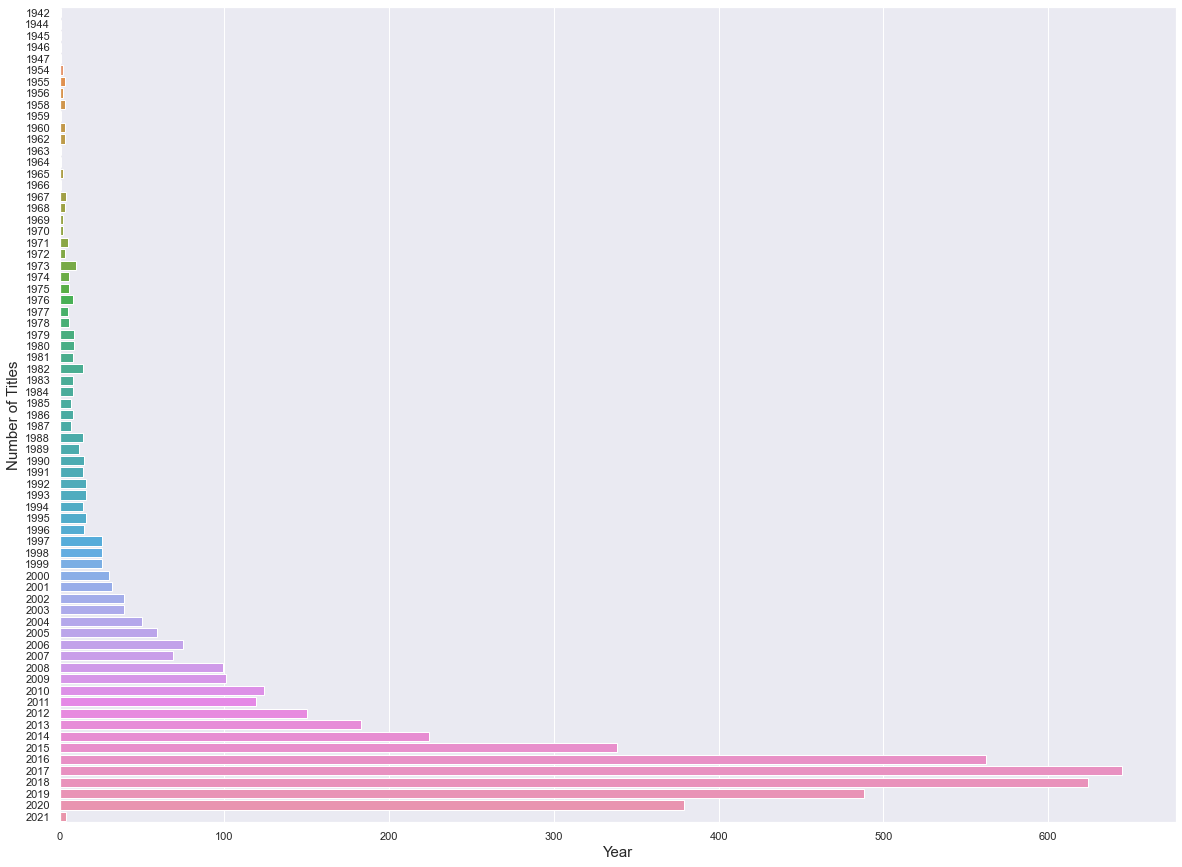

In [13]:
# Now find the number of movies released per year
plt.figure(figsize=(20,15))
plt.rcParams['font.size'] = 25
sns.countplot(y=new_df['release_year']);
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Titles',fontsize=15);

## Here countplot is preffered as we are plotting the number of different years present in the dataframe , in case of normal plot we have to count the number of occurences also which will be more hectic

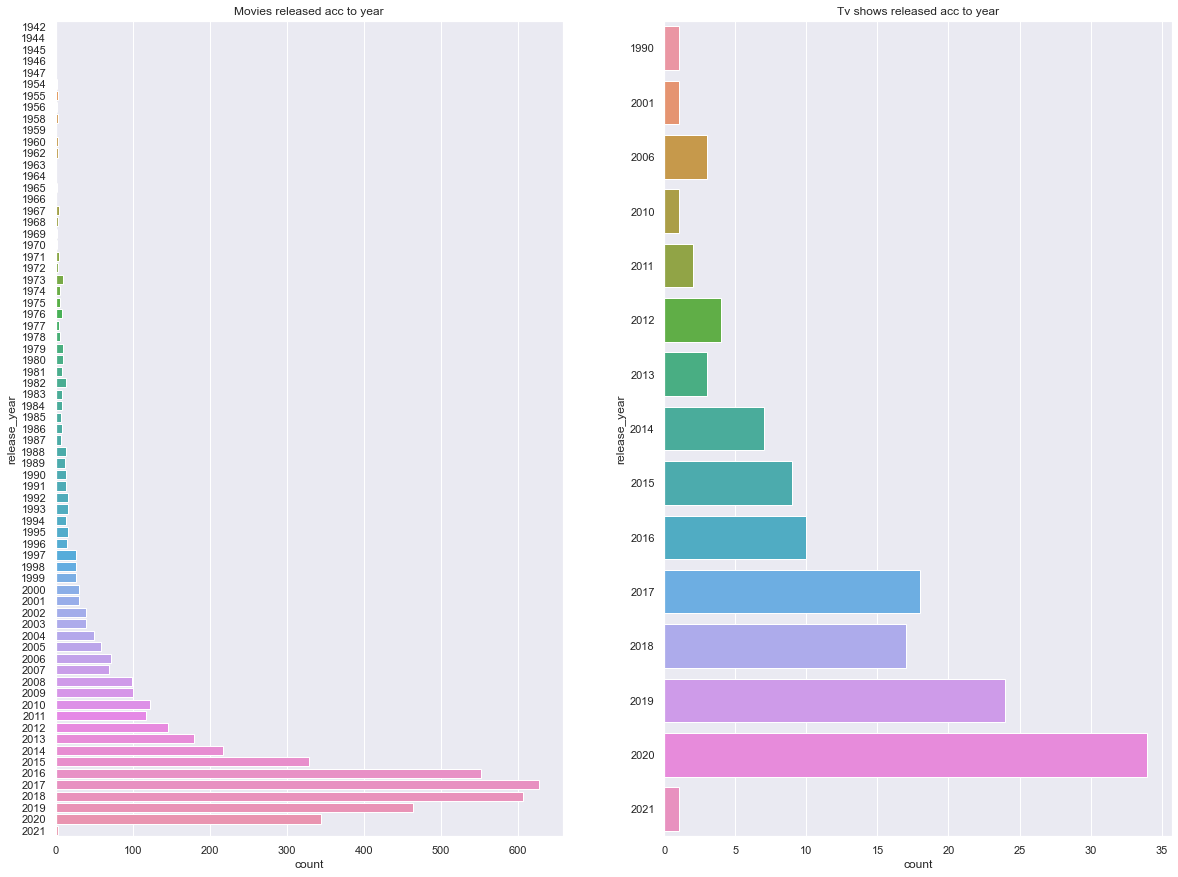

In [14]:
# Now we will also see the variations of movies and TV shows differently through the years
fig, ax = plt.subplots(1,2, figsize=(20, 15))
g1=sns.countplot(y=movies_df['release_year'],ax=ax[0]);
g1.set_title('Movies released acc to year');

g2=sns.countplot(y=tv_shows_df['release_year'],ax=ax[1]);
g2.set_title('Tv shows released acc to year');
fig.show()

## We can see the addition of movies as well as TV Shows are increasing steadily but we can also see the sudden rise in numbers of tv shows instead of movies in recent years, this may also be a result of the pandemic as shooting of movies takes a long time.

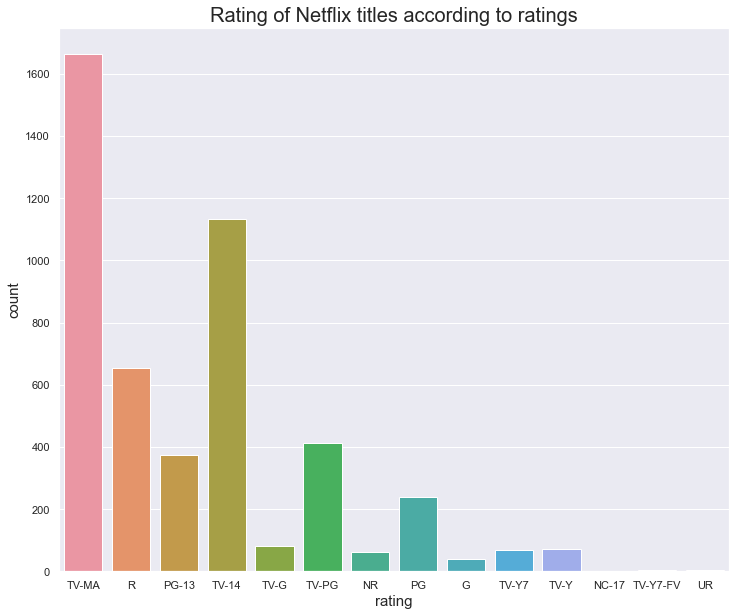

In [15]:
# similarly lets find the different ratings present
plt.figure(figsize=(12,10))
plt.rcParams['font.size'] = 25
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('Number',fontsize=15);
sns.countplot(new_df['rating']);
plt.title('Rating of Netflix titles according to ratings',fontsize = 20);

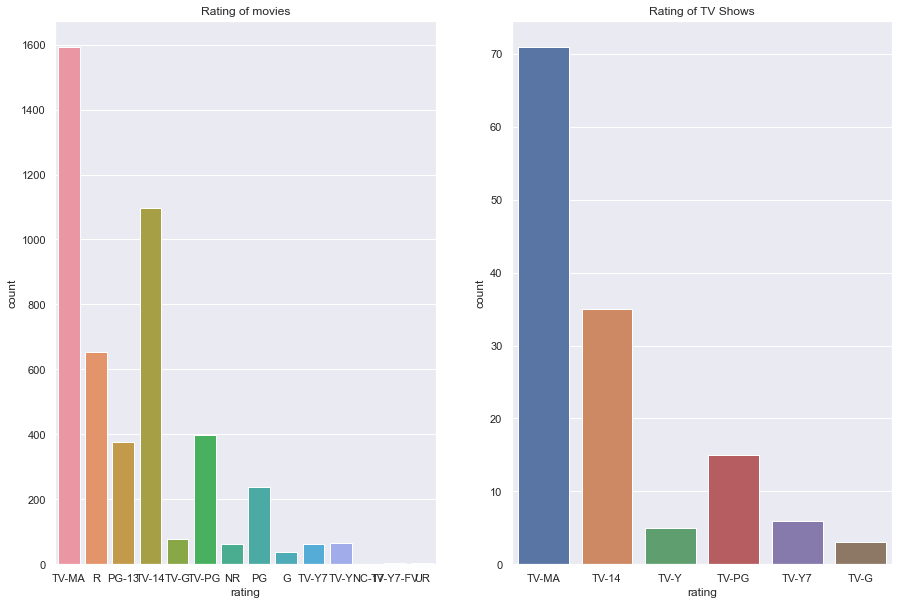

In [16]:
# Now we will also observe the trends in movies and tv shows
fig, ax = plt.subplots(1,2, figsize=(15, 10))
g1=sns.countplot(movies_df['rating'],ax=ax[0]);
g1.set_title('Rating of movies')

g2=sns.countplot(tv_shows_df['rating'],ax=ax[1]);
g2.set_title('Rating of TV Shows')
fig.show()

### From the above demographics we get an idea that most of the shows are for a more mature audience.

In [17]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


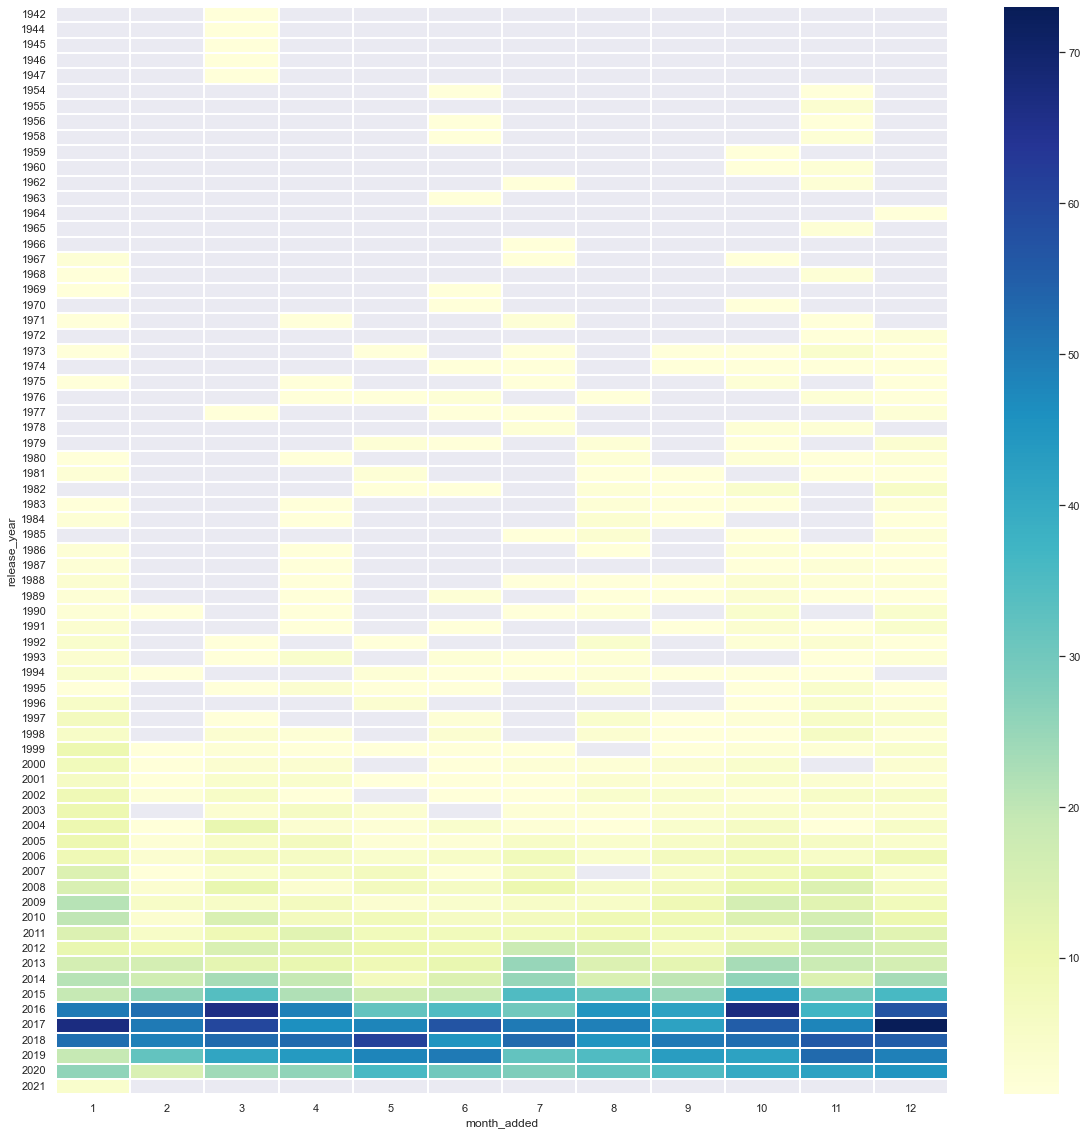

In [18]:
plt.figure(figsize=(20,20))
new_df['month_added'] = pd.DatetimeIndex(new_df['date_added']).month
sns.heatmap(new_df.groupby('release_year')['month_added'].value_counts().unstack(), linewidths=0.025,cmap="YlGnBu");

### **This heatmap also shows that even during the recent spur of addition of titles most of them have been added around the holiday periods.**

In [19]:
movies_df['duration']=movies_df.duration.str.replace(' min','').astype(int)

In [20]:
tv_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows_df.seasons = tv_shows_df.seasons.str.replace(' Seasons','').astype(int)

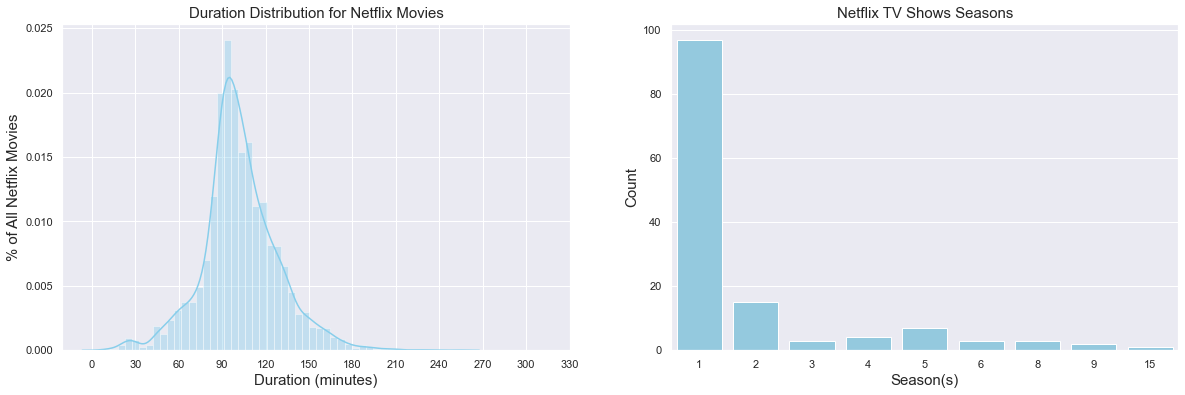

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

g1 = sns.distplot(movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies",fontsize = 15)
g1.set_ylabel("% of All Netflix Movies",fontsize = 15)
g1.set_xlabel("Duration (minutes)",fontsize = 15)

g2 = sns.countplot(tv_shows_df.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons",fontsize = 15)
g2.set_ylabel("Count",fontsize = 15)
g2.set_xlabel("Season(s)",fontsize = 15)
fig.show()

## This shows that incase of Movies most are between 90-120 mins ans in case of TV shows most have at-most 2 seasons (i.e. most of them are relatively new).

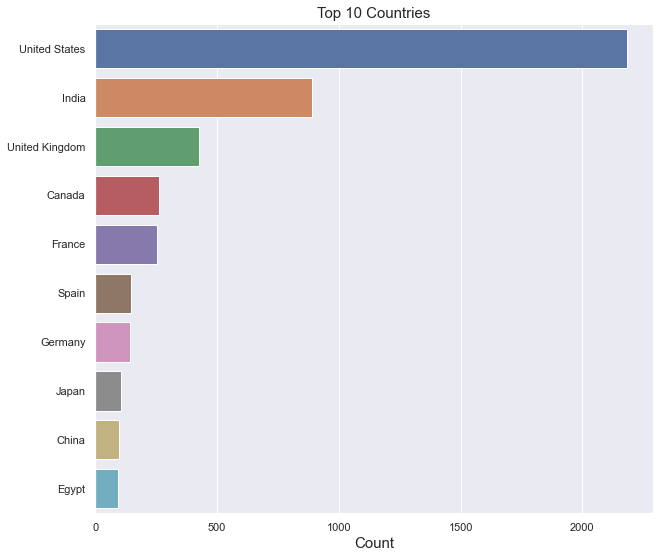

In [23]:
countries_df = new_df.set_index('title').country.str.split(', ',expand = True).stack()
plt.figure(figsize=(10,9))
sns.countplot(y=countries_df, order=countries_df.value_counts().index[:10]);
plt.title('Top 10 Countries', fontsize=15)
plt.xlabel('Count', fontsize=15);

## Here we can see the top 10 Countries whose content is available on Netflix

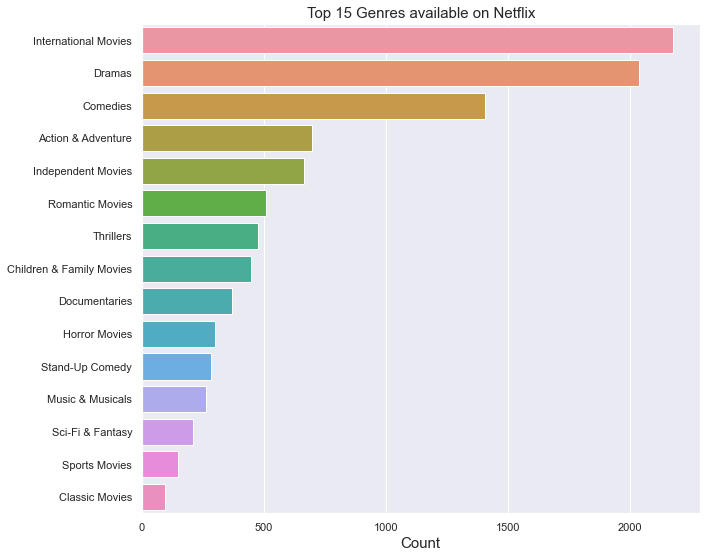

In [24]:
genre_df = new_df.set_index('title').listed_in.str.split(', ',expand =True).stack()
plt.figure(figsize=(10,9))
sns.countplot(y=genre_df, order=genre_df.value_counts().index[:15]);
plt.title('Top 15 Genres available on Netflix', fontsize=15)
plt.xlabel('Count', fontsize=15);

From the above graph we can assert that most of the movies and tv shows can be classified as family centric as they are more light hearted than other action or thrillers. Moreover the most ones are international thus we can also say that language now-a-days are no barrier towards entertainment.

# Answering Important Questions

# 1. Who are the directors with most titles?

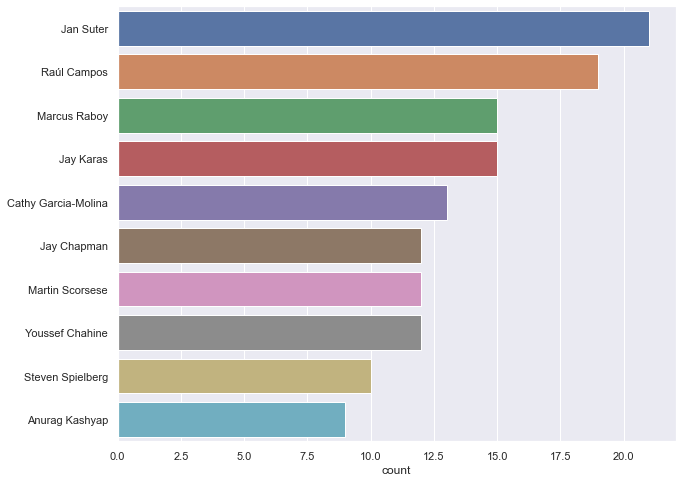

In [25]:
directors_df=new_df.set_index('title').director.str.split(', ',expand = True).stack()
plt.figure(figsize=(10,8))
sns.countplot(y=directors_df,order = directors_df.value_counts().index[:10]);
plt.show()

# 2. Who are the top actors on Netflix?

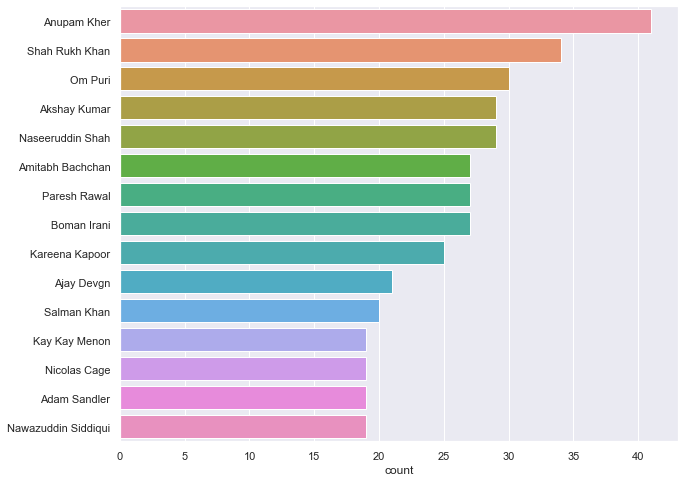

In [26]:
cast_df=new_df.set_index('title').cast.str.split(', ',expand = True).stack()
plt.figure(figsize=(10,8))
sns.countplot(y=cast_df,order = cast_df.value_counts().index[:15]);
plt.show()

## Here we can see among the top 15 most of them are Indian which is evident as India is the 2nd most titles on Netflix and the top most genre is International Movies

# 3. What is the distribution for International movies vs International TV shows

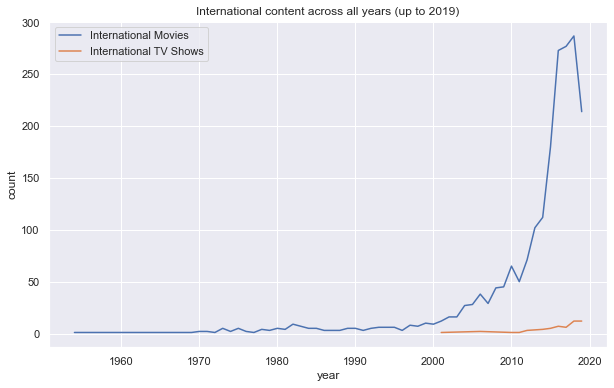

In [27]:
international_mov = new_df[new_df['listed_in'].str.contains('International Movies')]
intmov_df = international_mov['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
intmov_df = intmov_df[intmov_df.year<=2019]

international_tv = new_df[new_df['listed_in'].str.contains('International TV Shows')]
intshow_df = international_tv['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
intshow_df = intshow_df[intshow_df.year<=2019]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_df, x='year', y='count')
sns.lineplot(data=intshow_df, x='year', y='count')
#ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

# 4. What is the detailed distribution of Interational movies

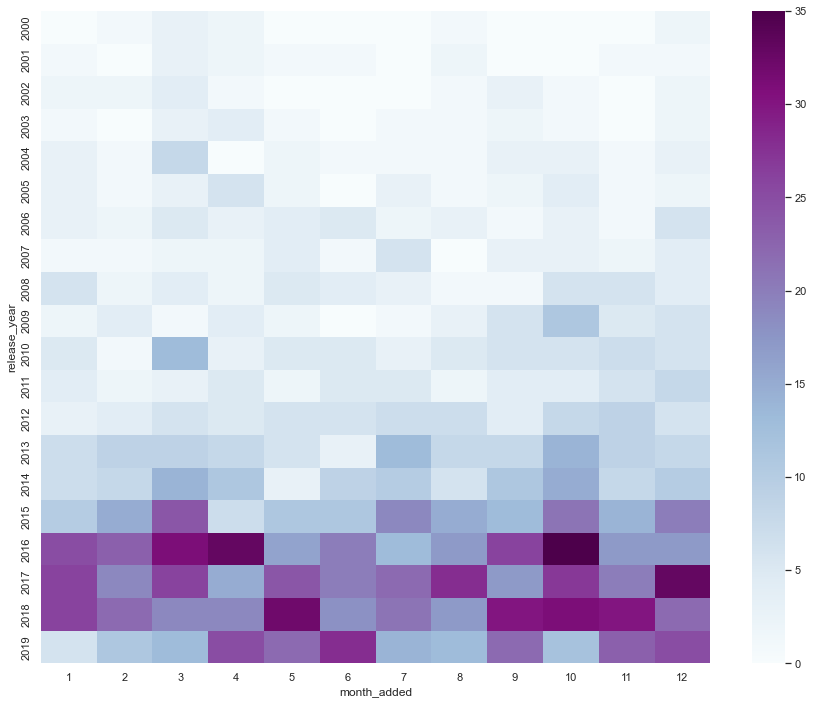

In [56]:
plt.figure(figsize=(15,12));
intm_df = international_mov.groupby('release_year')['month_added'].value_counts().unstack().fillna(0)
intm_df = intm_df[intm_df.index<2020]
intm_df = intm_df[intm_df.index>1999]
sns.heatmap(data = intm_df, cmap="BuPu");
plt.show()

# Conclusion
It is clear from the exploration of data that over the years the database of Netflix has become vast having titles fom multiple countries and languages having vast number of genres. Moreover they have also increased the quality of movies as well as now it has become one of the top streaming sites of the world, but COVID-19 has affected its in a noticeble way as the number of movies has decreased after COVID but the TV Shows didn't have such intensity of decrease, this may also be a cause of the lockdown and different rules and regulations that have added the reasons for the delay of the production cycle. But as a whole Netflix has only seen growth even in these times that can also be a result of more and more people staying home prefer Netflix over other modes of Entertainment.

# Future Work
* Including the IMDB dataset and compairing the statistics of both
* Recommendation Engine based on IMDB ratings and self prefferences
* Including more data and increasing the number of visualizations


# References
* https://www.kaggle.com/shivamb/netflix-shows
* https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10